# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands
    

In [2702]:
# Supress Warnings import libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


## 1. Data understanding, preparation and EDA

In [2703]:
dataset = pd.read_csv("day.csv")
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2704]:
# total number of rows and columns
dataset.shape

(730, 16)

In [2705]:
#information of a data set 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2706]:
#summary desc of numeric fields / variables 
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2707]:
#check all variables missing value
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [2708]:
# Remove the casual and registered columns as its not needed. cnt is already is sum of both of these columns. 
dataset.drop(['instant','casual','registered'], axis=1,inplace = True)
dataset.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Rename the columns for better understanding

In [2709]:
dataset.rename(columns = {'dteday':'bookingdate','mnth':'month','hum':'humidity','yr':'year',}, inplace = True) 
dataset.head()

,bookingdate,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### update values of the variables for better understanding season, month, weathersit, weekday


In [2710]:
dataset['month']=dataset.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
dataset['weathersit']=dataset.weathersit.map({1: 'Clear',
                                           2: 'MistBroken',
                                           3: 'LightSnow',
                                           4: 'HeavyRain'})
dataset['weekday']=dataset.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
dataset['season']=dataset.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
  
dataset.head()

,bookingdate,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,01-01-2018,spring,0,Jan,0,Sat,0,MistBroken,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Sun,0,MistBroken,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [2711]:
dataset.drop(['bookingdate'], axis=1,inplace = True)
dataset.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,MistBroken,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,MistBroken,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 2. Data Visualisation  


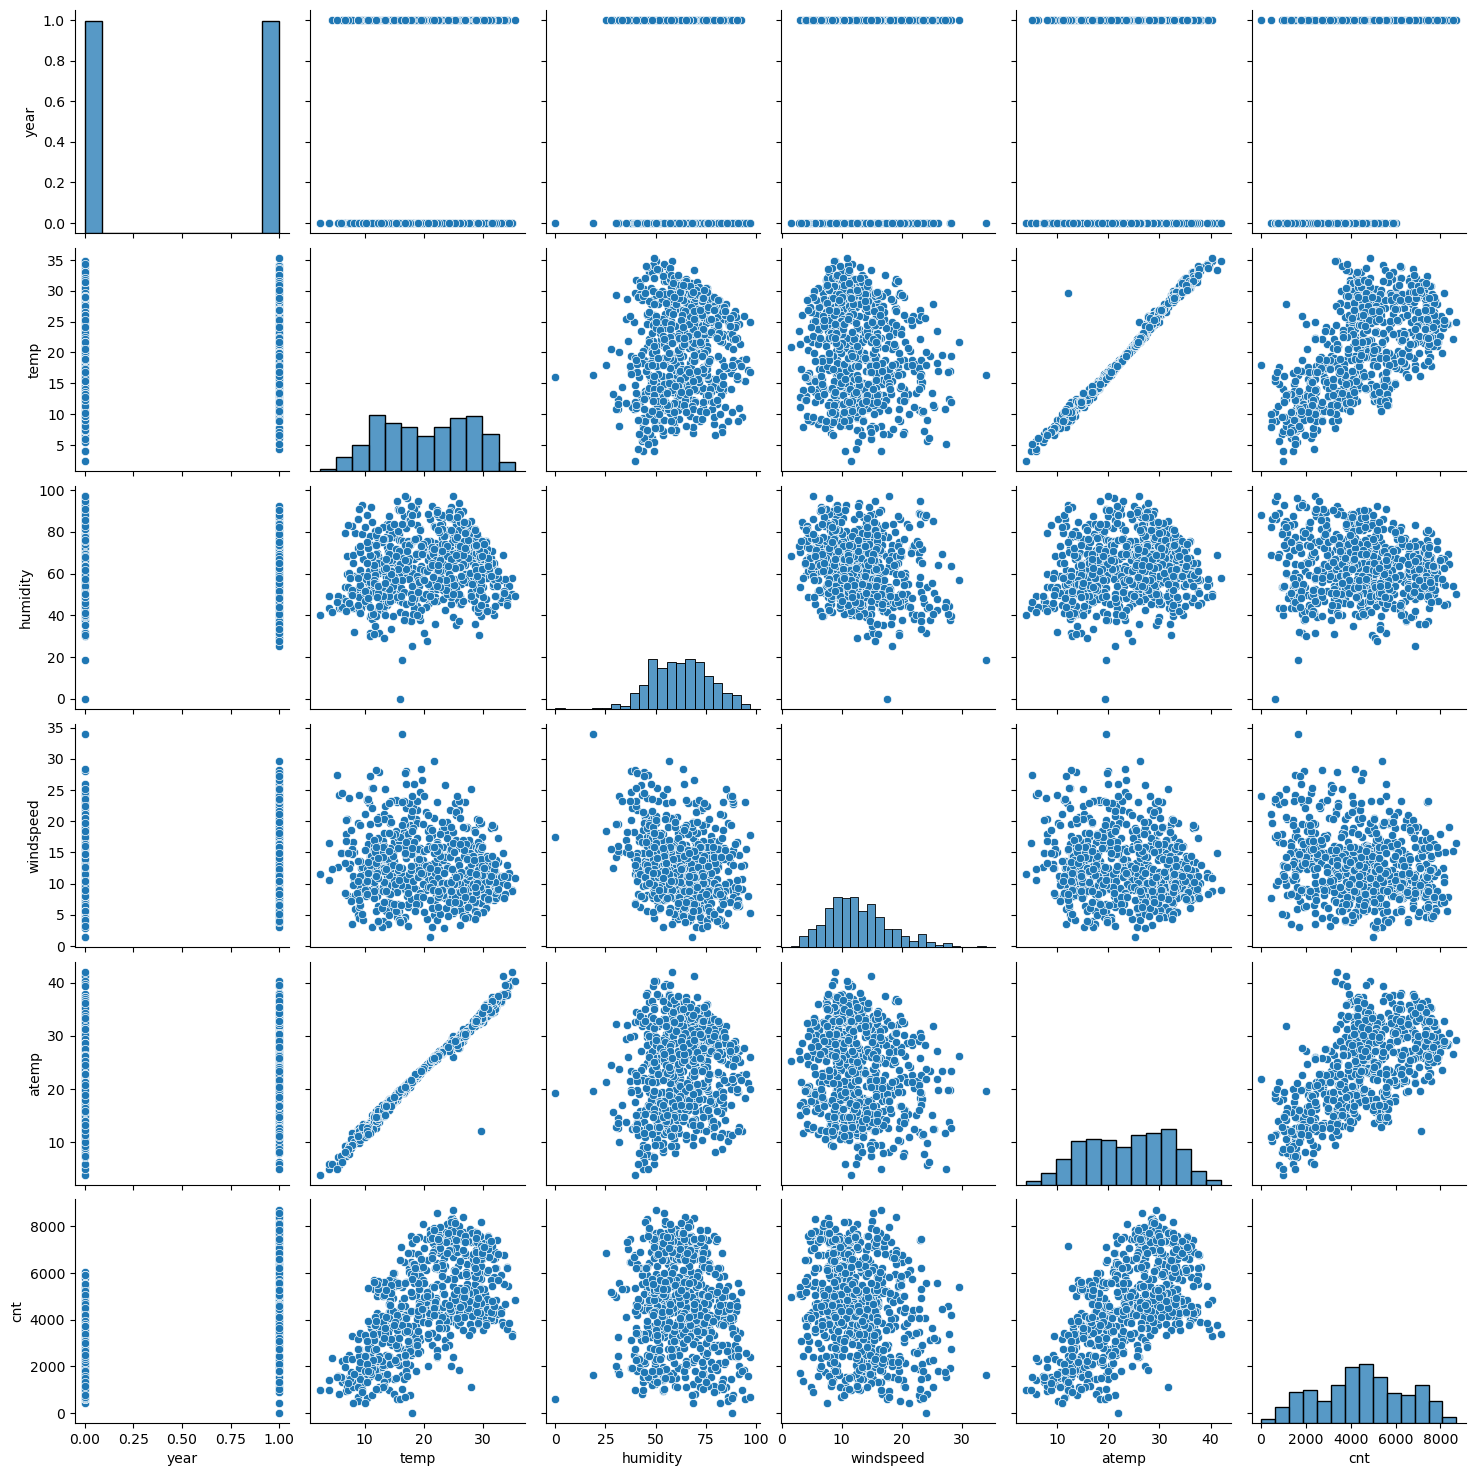

In [2712]:
#Pairplot for numeric variables
#Pairplot for numeric variables
sns.pairplot(dataset, vars=["year","temp", "humidity",'windspeed','atemp','cnt'])
plt.show()

In [2713]:
#check the categorical variables 
dataset.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
windspeed     649
atemp         689
cnt           695
dtype: int64

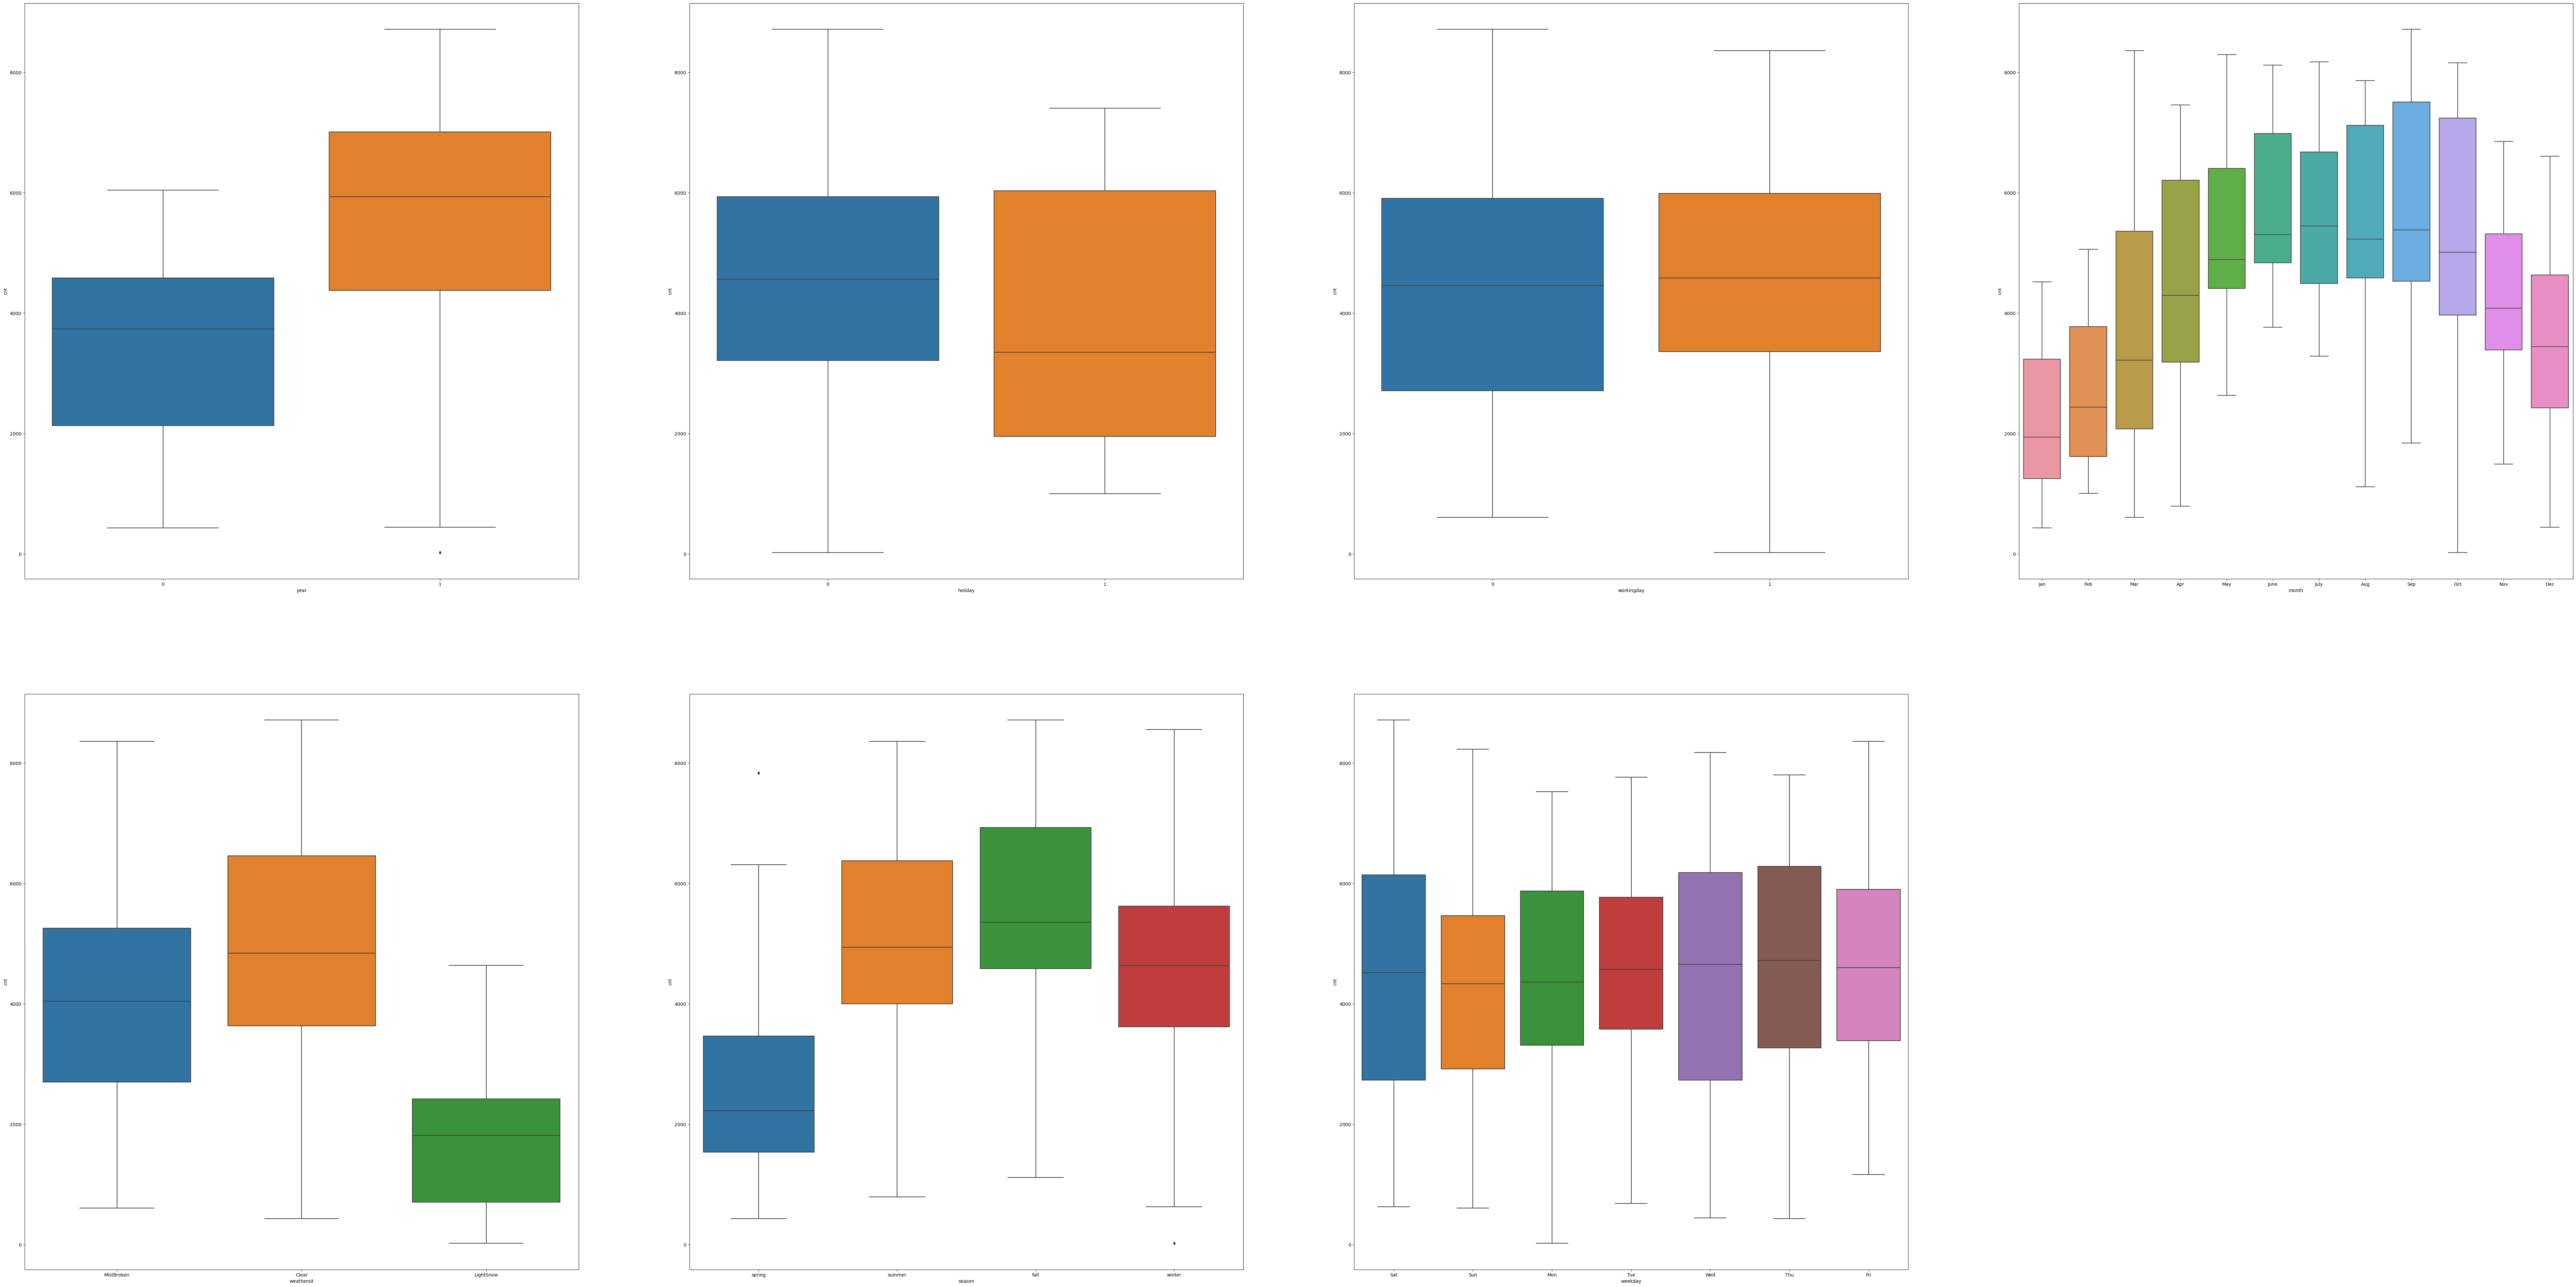

In [2714]:
##visualize the relation between cnt and all categorical variables  
plt.figure(figsize=(100, 50))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'cnt', data = dataset)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataset)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'cnt', data = dataset)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)

plt.show()

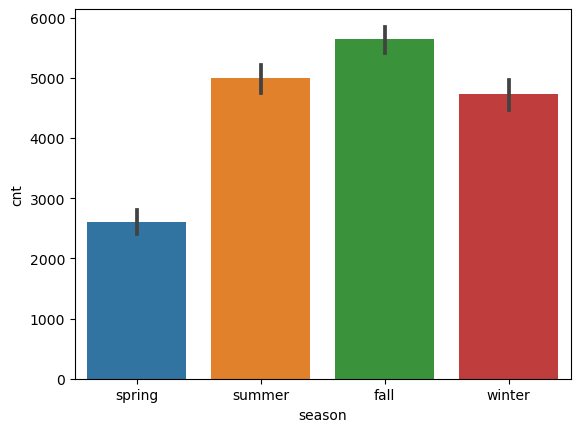

In [2715]:
sns.barplot(x ='season',y='cnt',data=dataset)
plt.show()

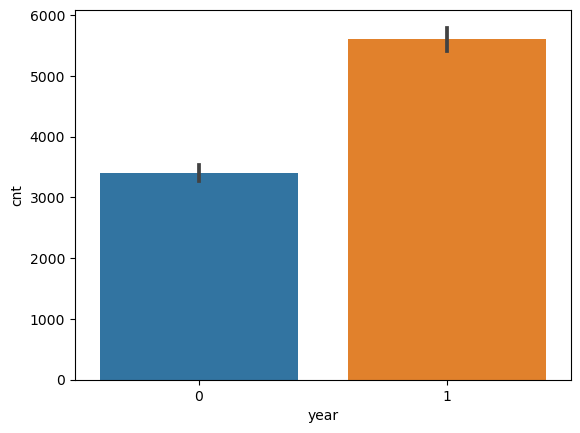

In [2716]:
sns.barplot(x ='year',y='cnt',data=dataset)
plt.show()

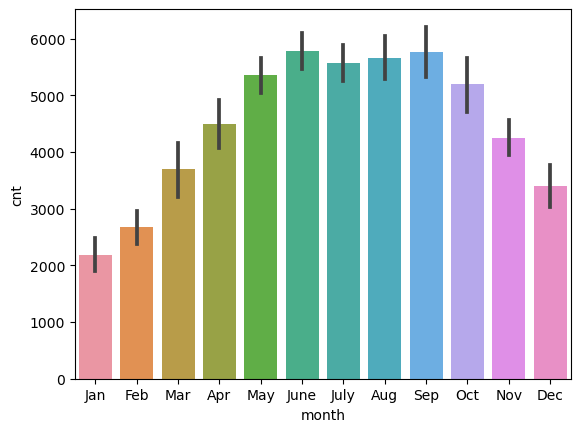

In [2717]:
sns.barplot(x ='month',y='cnt',data=dataset)
plt.show()

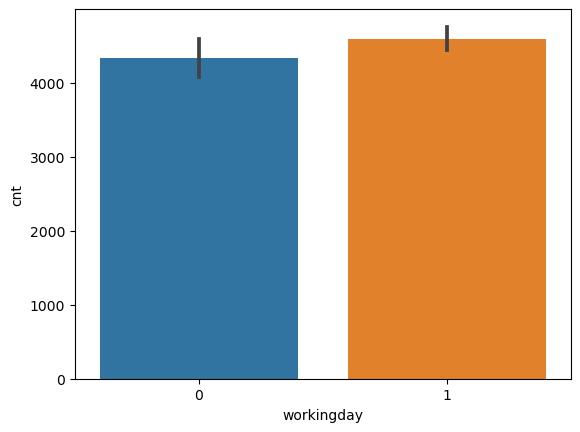

In [2718]:
sns.barplot(x ='workingday',y='cnt',data=dataset)
plt.show()

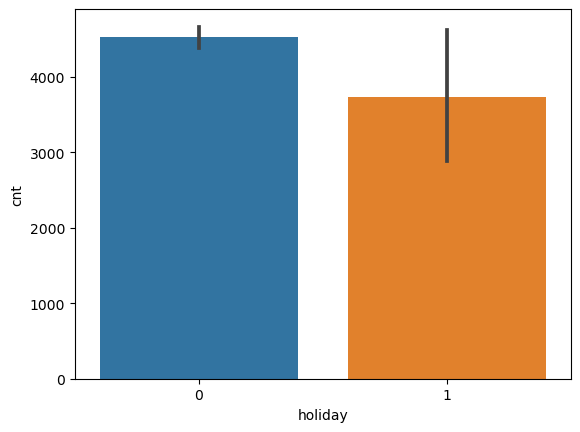

In [2719]:
sns.barplot(x ='holiday',y='cnt',data=dataset)
plt.show()

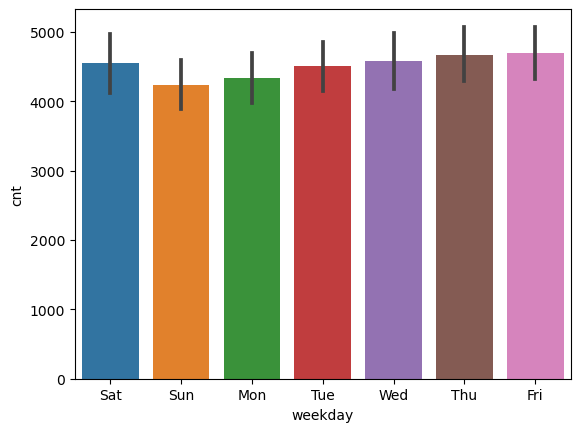

In [2720]:
sns.barplot(x ='weekday',y='cnt',data=dataset)
plt.show()

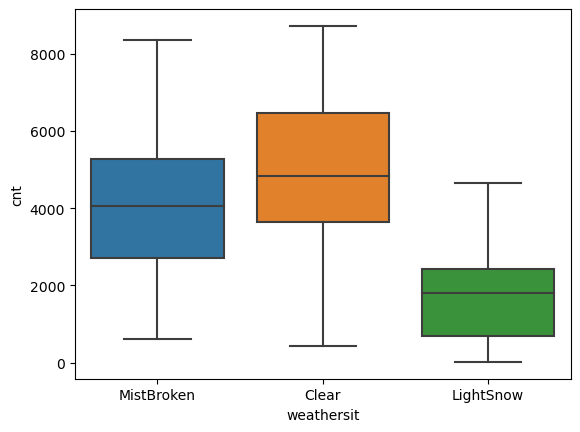

In [2721]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)
plt.show()

## 3. Dummy Variables  


In [2722]:
# Get the dummy variables  
months=pd.get_dummies(dataset.month,drop_first=True)
weekdays=pd.get_dummies(dataset.weekday,drop_first=True)
weathersit=pd.get_dummies(dataset.weathersit,drop_first=True)
seasons=pd.get_dummies(dataset.season,drop_first=True)

In [2723]:
dataset=pd.concat([months,weekdays,weather_sit,seasons,dataset],axis=1)
dataset.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,MistBroken,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,MistBroken,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [2724]:
dataset.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
dataset.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [2725]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         730 non-null    uint8  
 1   Dec         730 non-null    uint8  
 2   Feb         730 non-null    uint8  
 3   Jan         730 non-null    uint8  
 4   July        730 non-null    uint8  
 5   June        730 non-null    uint8  
 6   Mar         730 non-null    uint8  
 7   May         730 non-null    uint8  
 8   Nov         730 non-null    uint8  
 9   Oct         730 non-null    uint8  
 10  Sep         730 non-null    uint8  
 11  Mon         730 non-null    uint8  
 12  Sat         730 non-null    uint8  
 13  Sun         730 non-null    uint8  
 14  Thu         730 non-null    uint8  
 15  Tue         730 non-null    uint8  
 16  Wed         730 non-null    uint8  
 17  LightSnow   730 non-null    uint8  
 18  MistBroken  730 non-null    uint8  
 19  spring      730 non-null    u

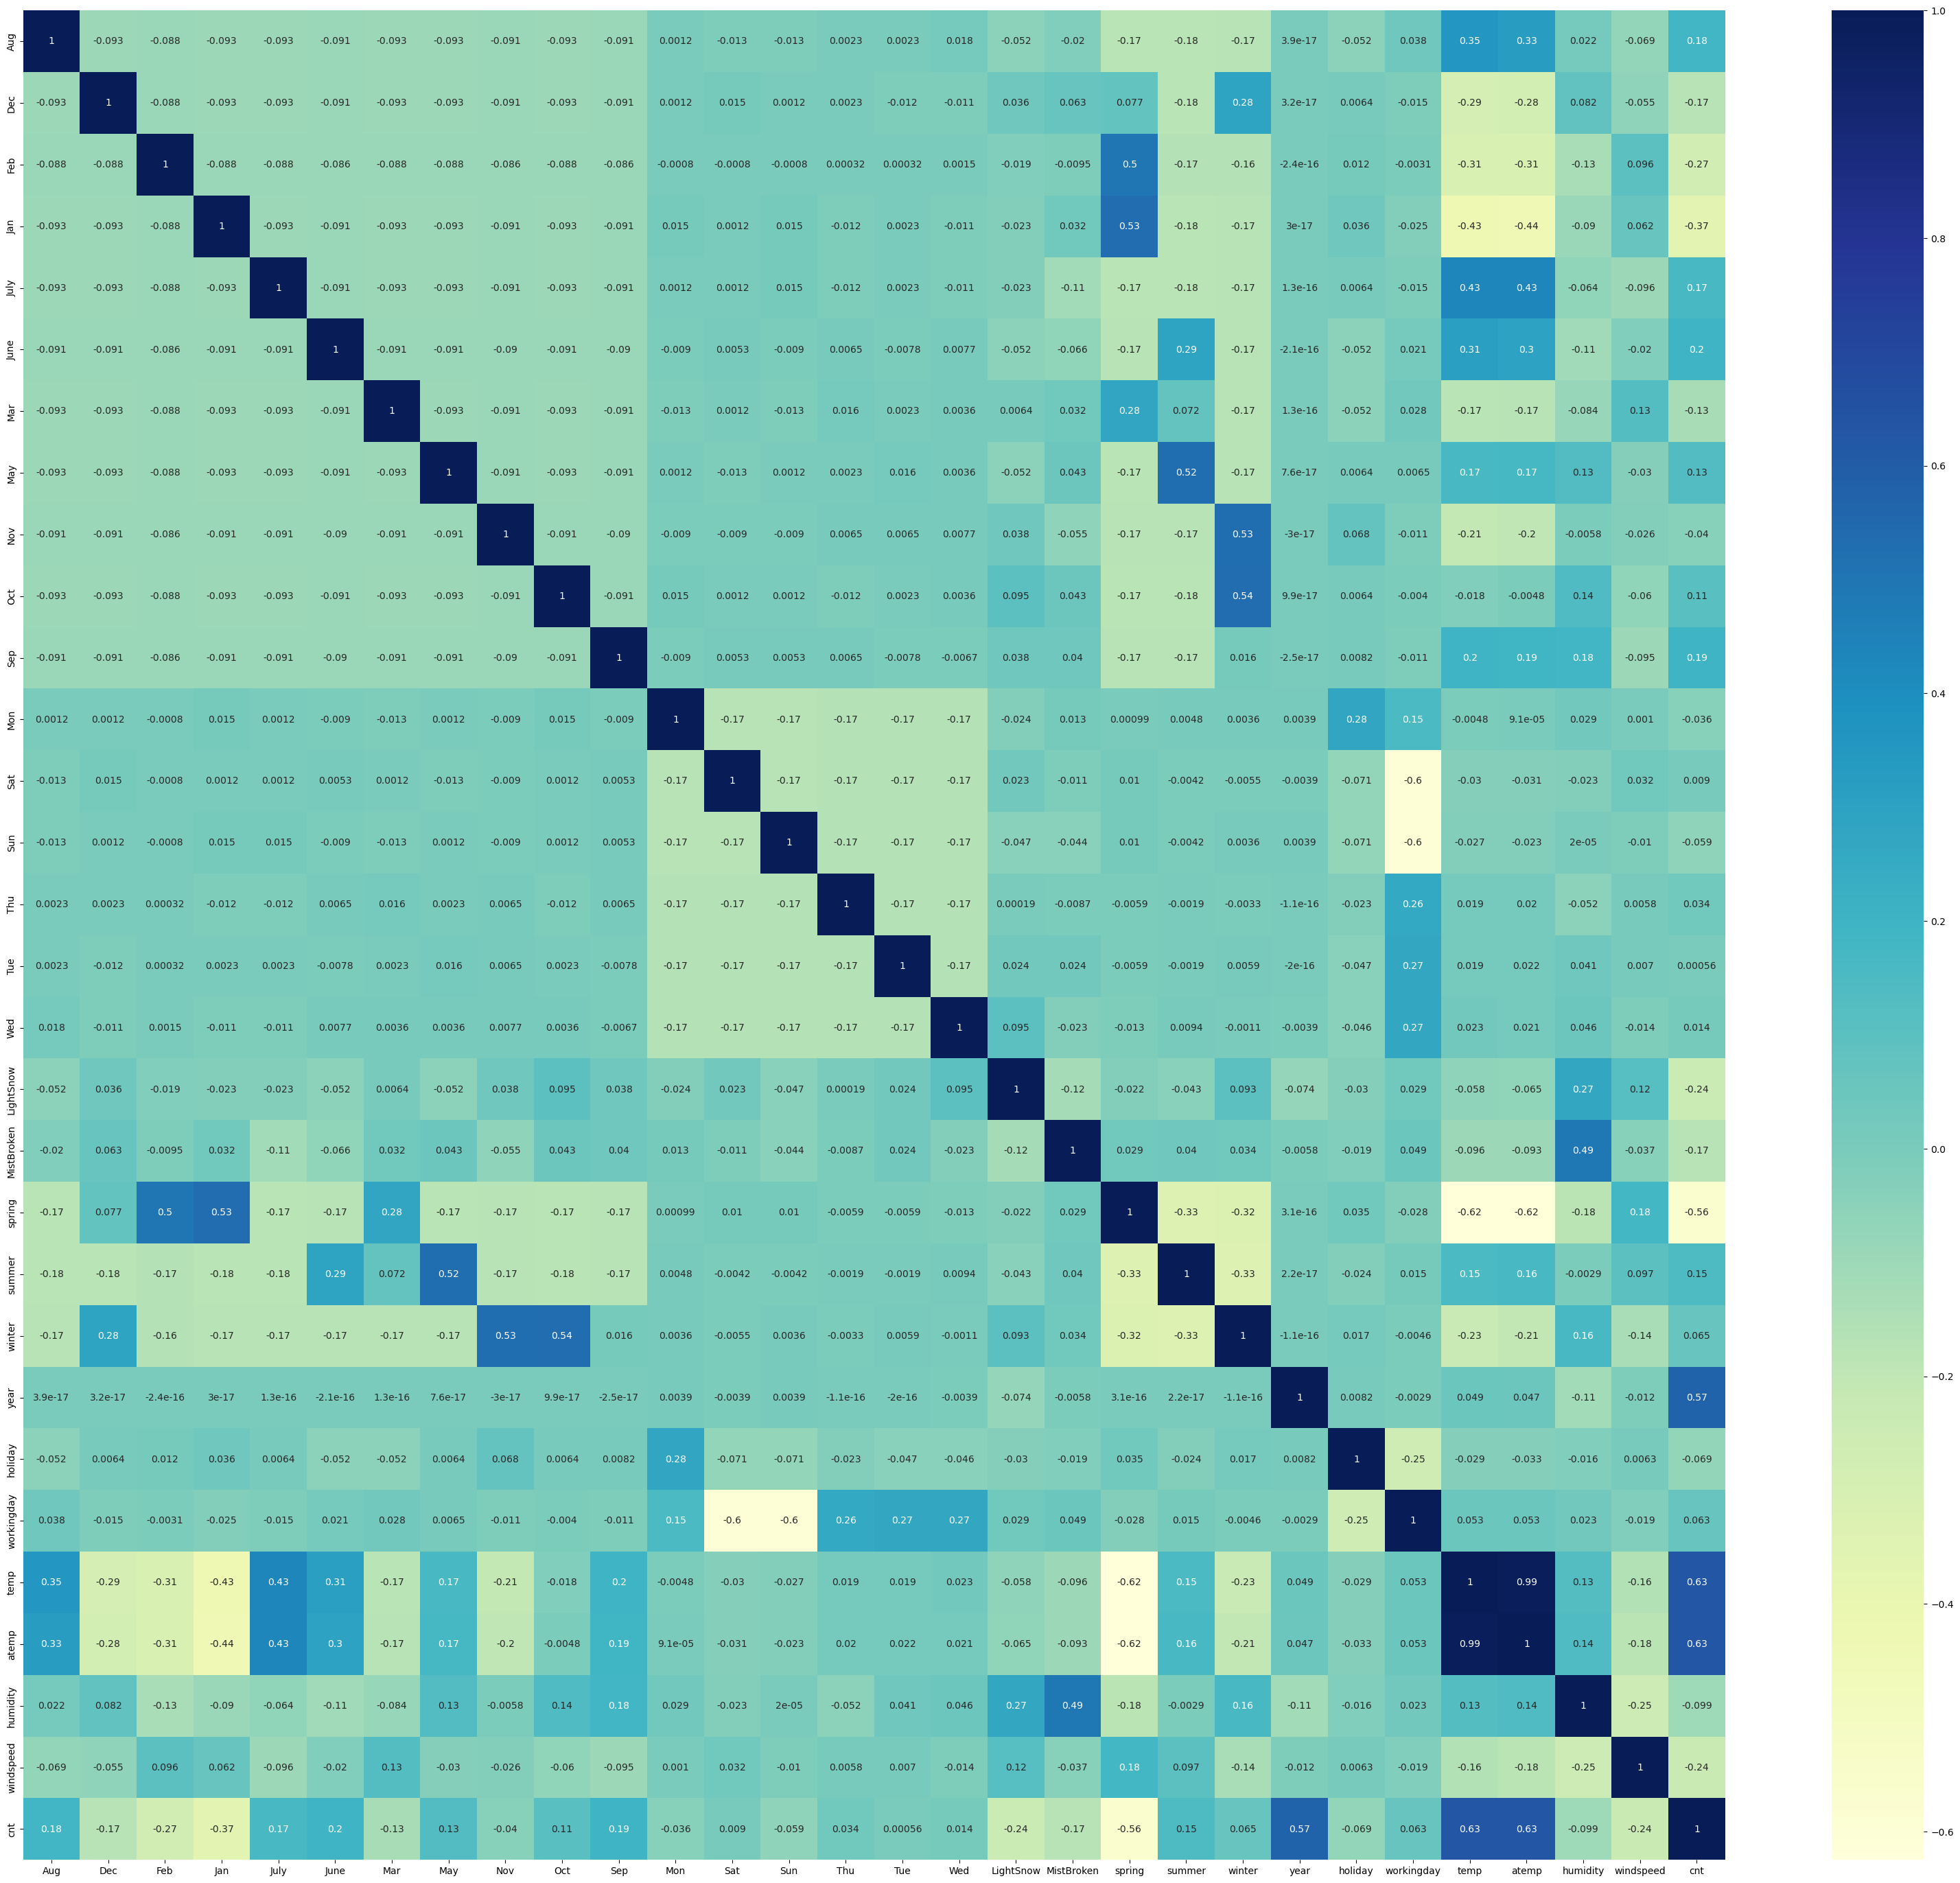

In [2726]:
plt.figure(figsize = (40, 35))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 4. Training and Test Set  


In [2727]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test_ana = train_test_split(dataset, train_size = 0.7, random_state = 100)

print(dataset.shape) #full dataset 
print(dataset_test_ana.shape) #30%
print(dataset_train.shape) # 70%


(730, 30)
(220, 30)
(510, 30)


In [2728]:
dataset.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'LightSnow',
       'MistBroken', 'spring', 'summer', 'winter', 'year', 'holiday',
       'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [2729]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2730]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

dataset_train[num_vars] = scaler.fit_transform(dataset_train[num_vars])

In [2731]:
dataset_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [2732]:
dataset_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2733]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         510 non-null    uint8  
 1   Dec         510 non-null    uint8  
 2   Feb         510 non-null    uint8  
 3   Jan         510 non-null    uint8  
 4   July        510 non-null    uint8  
 5   June        510 non-null    uint8  
 6   Mar         510 non-null    uint8  
 7   May         510 non-null    uint8  
 8   Nov         510 non-null    uint8  
 9   Oct         510 non-null    uint8  
 10  Sep         510 non-null    uint8  
 11  Mon         510 non-null    uint8  
 12  Sat         510 non-null    uint8  
 13  Sun         510 non-null    uint8  
 14  Thu         510 non-null    uint8  
 15  Tue         510 non-null    uint8  
 16  Wed         510 non-null    uint8  
 17  LightSnow   510 non-null    uint8  
 18  MistBroken  510 non-null    uint8  
 19  spring      510 non-null   

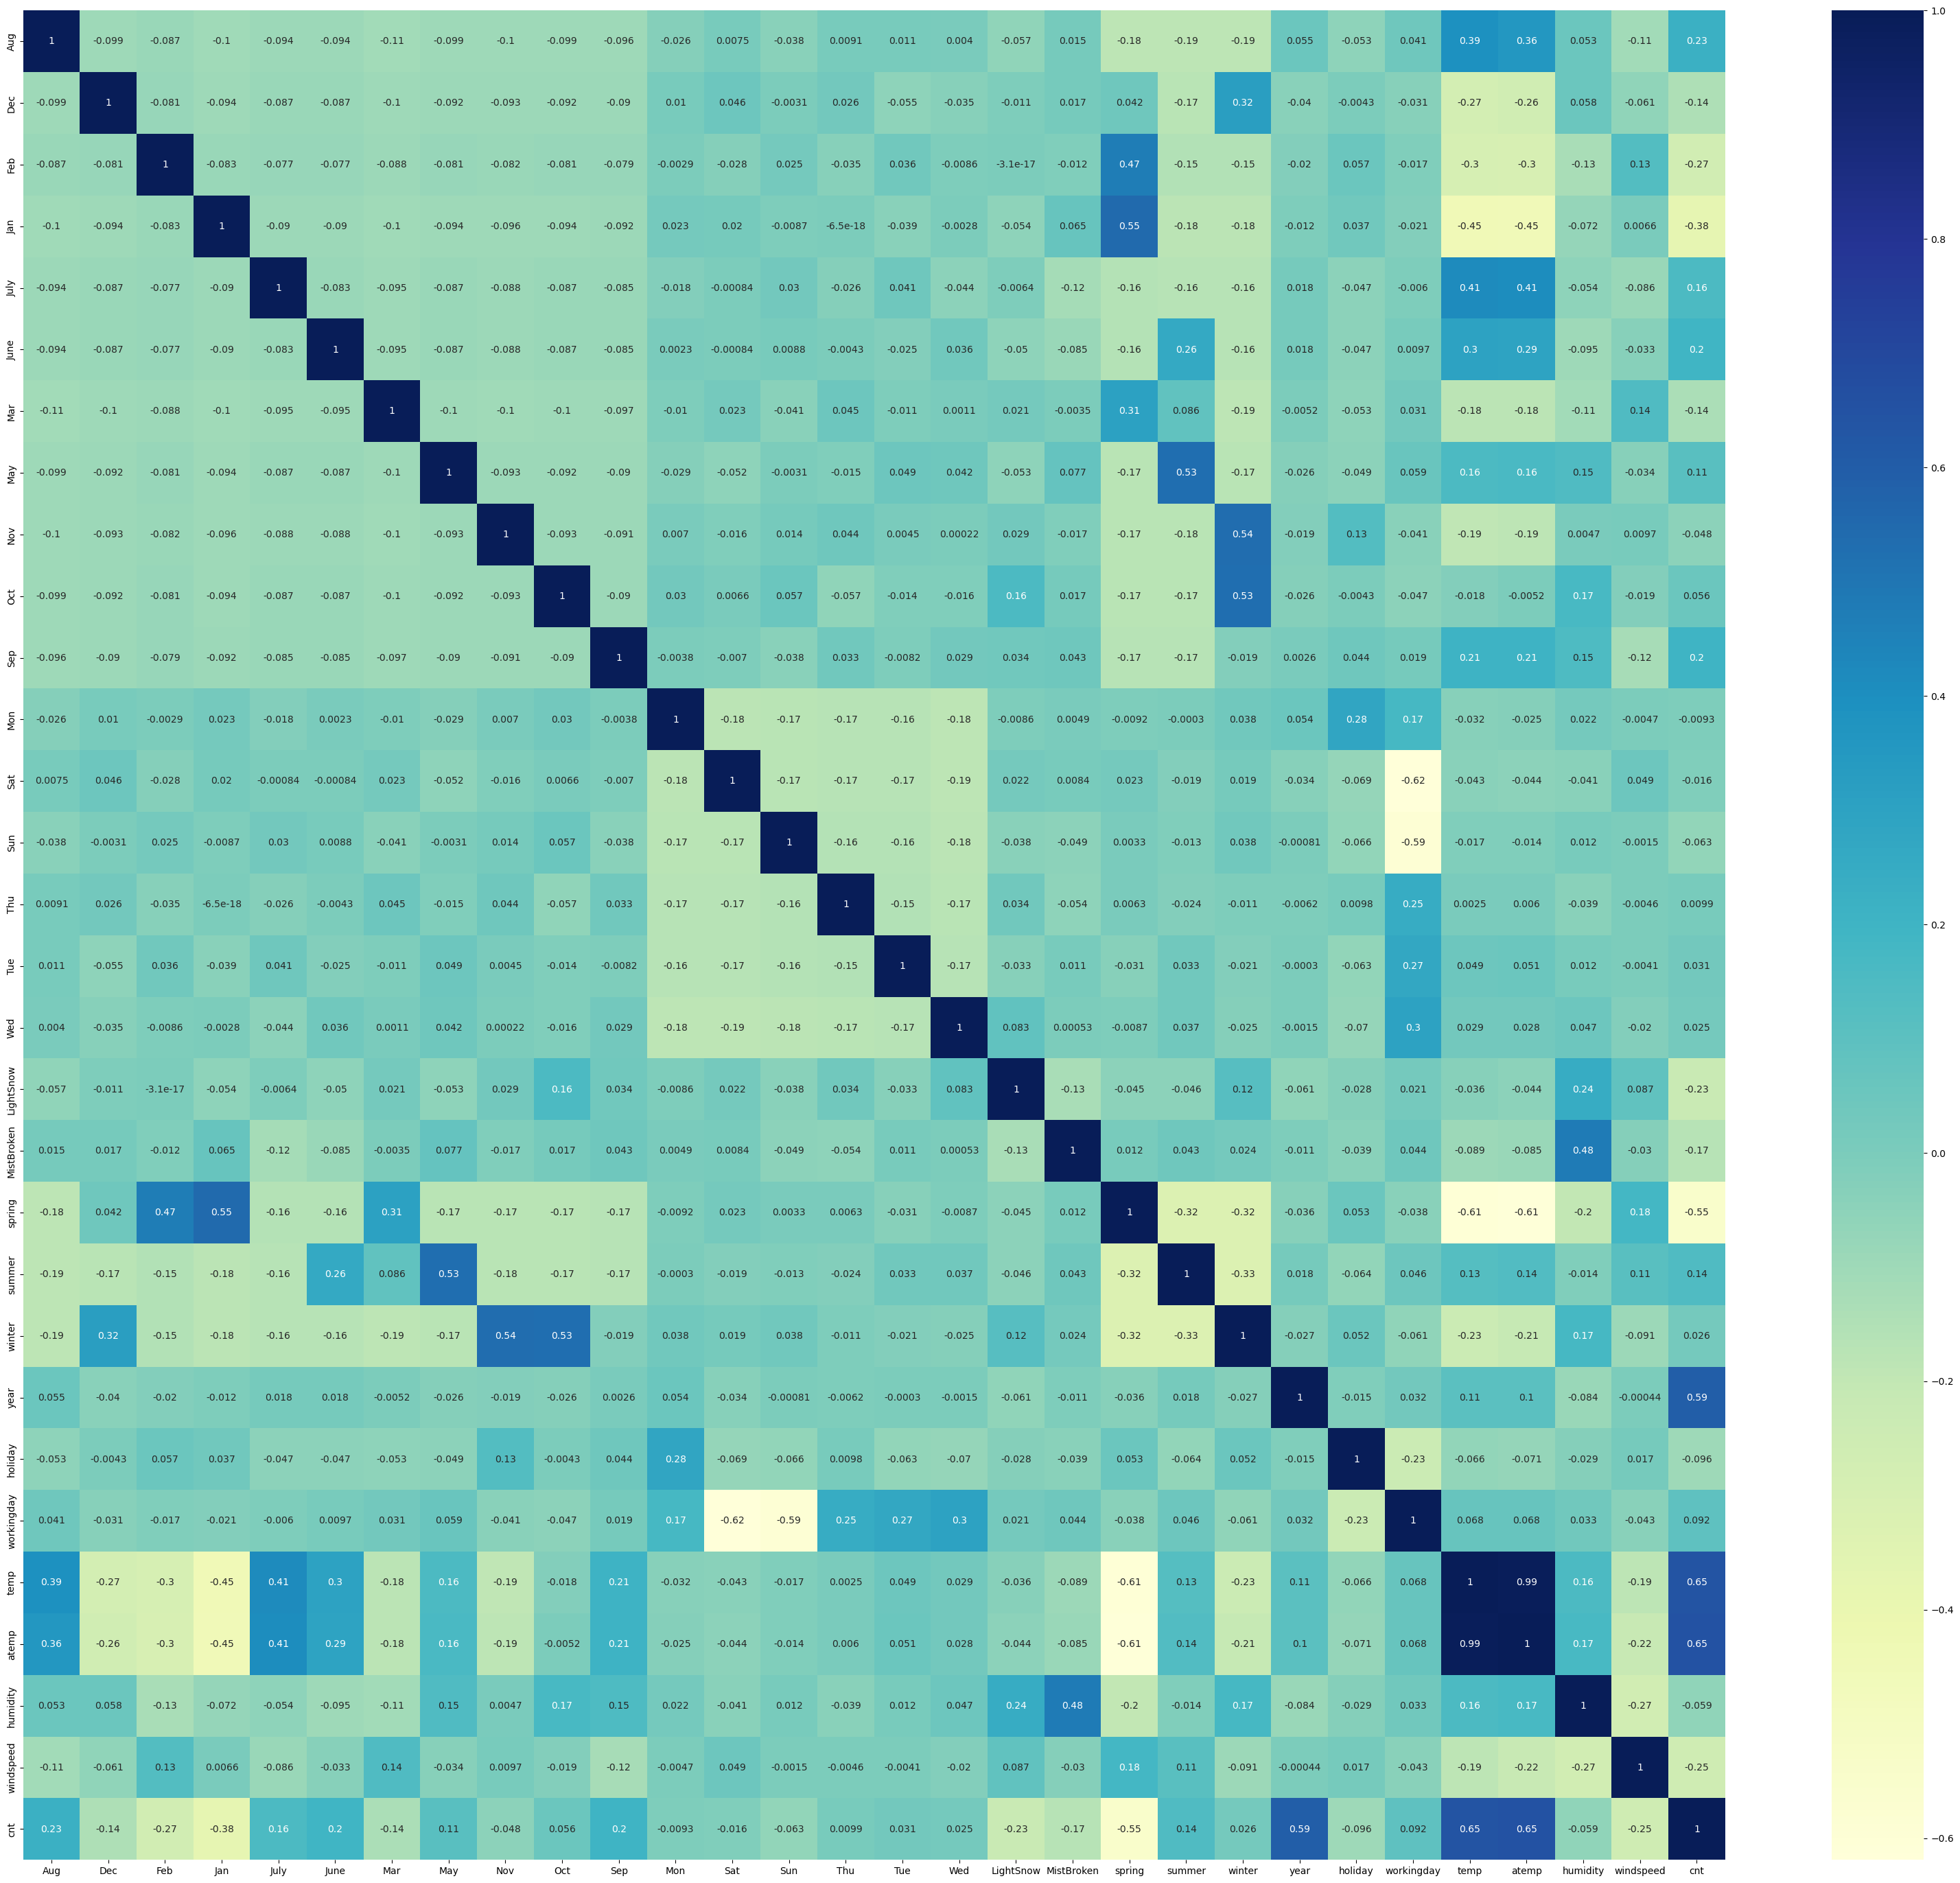

In [2734]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (40, 35))
sns.heatmap(dataset_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 5. Building a linear model


In [2735]:
y_train = dataset_train.pop('cnt')
X_train = dataset_train

In [2736]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         510 non-null    uint8  
 1   Dec         510 non-null    uint8  
 2   Feb         510 non-null    uint8  
 3   Jan         510 non-null    uint8  
 4   July        510 non-null    uint8  
 5   June        510 non-null    uint8  
 6   Mar         510 non-null    uint8  
 7   May         510 non-null    uint8  
 8   Nov         510 non-null    uint8  
 9   Oct         510 non-null    uint8  
 10  Sep         510 non-null    uint8  
 11  Mon         510 non-null    uint8  
 12  Sat         510 non-null    uint8  
 13  Sun         510 non-null    uint8  
 14  Thu         510 non-null    uint8  
 15  Tue         510 non-null    uint8  
 16  Wed         510 non-null    uint8  
 17  LightSnow   510 non-null    uint8  
 18  MistBroken  510 non-null    uint8  
 19  spring      510 non-null   

In [2737]:
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.169031
temp     0.640944
dtype: float64

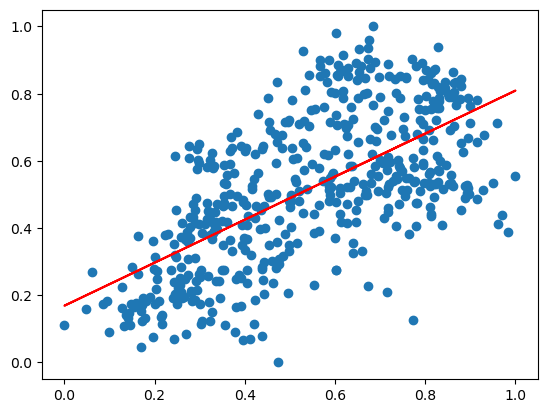

In [2738]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [2739]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.46e-61
Time:                        12:02:00   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

### Adding  All Variables


In [2740]:
X_train.columns

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'LightSnow',
       'MistBroken', 'spring', 'summer', 'winter', 'year', 'holiday',
       'workingday', 'temp', 'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [2741]:
X_train.shape

(510, 29)

In [2742]:
# Assign   the feature variables to X
# Add a constant
#X_train=X_train[['year','Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
#       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed','LightSnow',
#        'MistBroken', 'spring', 'summer','winter',  'windspeed','temp' , 'atemp', 'workingday', 'humidity'   ]]
col =  X_train.columns
X_train_lm = X_train[col]
#.columns
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const         0.243298
Aug           0.022270
Dec          -0.044274
Feb          -0.032316
Jan          -0.063064
July         -0.032657
June          0.006012
Mar           0.001555
May           0.025541
Nov          -0.039818
Oct           0.007713
Sep           0.086761
Mon          -0.021624
Sat           0.095176
Sun           0.040957
Thu          -0.009730
Tue          -0.018439
Wed          -0.005897
LightSnow    -0.254975
MistBroken   -0.059521
spring       -0.045355
summer        0.042369
winter        0.107081
year          0.232539
holiday       0.010892
workingday    0.096273
temp          0.387984
atemp         0.059045
humidity     -0.152016
windspeed    -0.183604
dtype: float64

In [2743]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.81e-180
Time:                        12:02:18   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.0

### Checking VIF


In [2744]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2745]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,workingday,85.56
25,temp,66.90
26,atemp,56.03
12,Sat,19.71
13,Sun,18.34
19,spring,10.77
21,winter,9.46
20,summer,8.29
8,Nov,6.79
0,Aug,6.47


In [2746]:
# -- OctOct is insignificant in presence of other variables due to high p-value and high VIF hence can be dropped
X2 = X_train.drop('Oct', 1,)
# Build a third fitted model
X_train_lm2 = sm.add_constant(X2)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.80e-181
Time:                        12:02:22   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2459      0.033      7.416      0.0

In [2747]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,workingday,76.10
24,temp,66.90
25,atemp,56.02
11,Sat,17.49
12,Sun,16.31
18,spring,10.77
20,winter,7.20
19,summer,6.84
0,Aug,4.97
4,July,4.45


In [2748]:
# -- MarMar is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X3 = X2.drop('Mar', 1,)
# Build a third fitted model
X_train_lm3 = sm.add_constant(X3)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.68e-182
Time:                        12:02:23   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2455      0.032      7.586      0.0

In [2749]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,workingday,72.29
23,temp,66.83
24,atemp,55.99
10,Sat,16.60
11,Sun,15.58
17,spring,9.26
19,winter,7.14
18,summer,6.84
0,Aug,4.90
4,July,4.42


In [2750]:
# -- JuneJune is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X4 = X3.drop('June', 1,)
# Build a third fitted model
X_train_lm4 = sm.add_constant(X4)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.55e-183
Time:                        12:02:25   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2457      0.032      7.604      0.0

In [2751]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,workingday,72.18
22,temp,60.92
23,atemp,54.96
9,Sat,16.55
10,Sun,15.54
16,spring,8.60
17,summer,6.66
18,winter,6.34
20,holiday,3.98
0,Aug,3.19


In [2752]:
# -- atempatemp is insignificant in presence of other variables due to high p-value and high VIF hence can be dropped
X5 = X4.drop('atemp', 1,)
# Build a third fitted model
X_train_lm5 = sm.add_constant(X5)

lr_5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.53e-184
Time:                        12:02:27   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2453      0.032      7.603      0.0

In [2753]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,workingday,72.11
9,Sat,16.55
10,Sun,15.54
16,spring,8.55
17,summer,6.60
18,winter,6.27
22,temp,4.92
20,holiday,3.96
0,Aug,3.17
4,July,2.81


In [2754]:
# -- WedWed is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X6 = X5.drop('Wed', 1,)
# Build a third fitted model
X_train_lm6 = sm.add_constant(X6)

lr_6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.42e-185
Time:                        12:02:28   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2447      0.032      7.601      0.0

In [2755]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,workingday,70.18
9,Sat,16.52
10,Sun,15.51
15,spring,8.55
16,summer,6.60
17,winter,6.27
21,temp,4.92
19,holiday,3.91
0,Aug,3.17
4,July,2.81


In [2756]:
# -- holidayholiday is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X7 = X6.drop('holiday', 1,)
# Build a third fitted model
X_train_lm7 = sm.add_constant(X7)

lr_7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.42e-185
Time:                        12:02:29   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2539      0.048      5.250      0.0

In [2757]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,humidity,36.38
20,temp,24.25
19,workingday,20.83
15,spring,8.39
16,summer,6.70
17,winter,6.69
9,Sat,5.91
10,Sun,5.58
22,windspeed,5.13
0,Aug,3.26


In [2758]:
# -- ThuThu is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X8 = X7.drop('Thu', 1,)
# Build a third fitted model
X_train_lm8 = sm.add_constant(X8)

lr_8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.36e-186
Time:                        12:02:30   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2512      0.048      5.235      0.0

In [2759]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,humidity,36.34
19,temp,24.14
18,workingday,20.80
14,spring,8.36
16,winter,6.68
15,summer,6.68
9,Sat,5.81
10,Sun,5.49
21,windspeed,5.12
0,Aug,3.26


In [2760]:
# -- AugAug is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X9 = X8.drop('Aug', 1,)
# Build a third fitted model
X_train_lm9 = sm.add_constant(X9)

lr_9 = sm.OLS(y_train, X_train_lm9).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.47e-187
Time:                        12:02:31   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2594      0.046      5.611      0.0

In [2761]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(X9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,humidity,35.48
18,temp,22.61
17,workingday,19.86
13,spring,6.09
8,Sat,5.52
9,Sun,5.30
20,windspeed,5.09
15,winter,4.45
14,summer,3.76
2,Jan,2.43


In [2762]:
# -- TueTue is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X10 = X9.drop('Tue', 1,)
# Build a third fitted model
X_train_lm10 = sm.add_constant(X10)

lr_10 = sm.OLS(y_train, X_train_lm10).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.51e-188
Time:                        12:02:32   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2580      0.046      5.582      0.0

In [2763]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X10.columns
vif['VIF'] = [variance_inflation_factor(X10.values, i) for i in range(X10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,humidity,35.40
17,temp,22.60
16,workingday,19.79
12,spring,6.09
8,Sat,5.49
9,Sun,5.26
19,windspeed,5.09
14,winter,4.45
13,summer,3.75
2,Jan,2.43


In [2764]:
# -- MonMon is insignificant in presence of other variables due to high p-value and high VIF hence can be dropped
X11 = X10.drop('Mon', 1,)
# Build a third fitted model
X_train_lm11 = sm.add_constant(X11)

lr_11 = sm.OLS(y_train, X_train_lm11).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          5.20e-189
Time:                        12:02:34   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.045      5.472      0.0

In [2765]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X11.columns
vif['VIF'] = [variance_inflation_factor(X11.values, i) for i in range(X11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,humidity,34.75
16,temp,22.48
15,workingday,19.11
11,spring,6.06
7,Sat,5.10
18,windspeed,5.06
8,Sun,4.89
13,winter,4.40
12,summer,3.71
2,Jan,2.42


In [2766]:
# -- MayMay is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X12 = X11.drop('May', 1,)
# Build a third fitted model
X_train_lm12 = sm.add_constant(X12)

lr_12 = sm.OLS(y_train, X_train_lm12).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          9.80e-190
Time:                        12:02:34   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.045      5.315      0.0

In [2767]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X12.columns
vif['VIF'] = [variance_inflation_factor(X12.values, i) for i in range(X12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,humidity,34.64
15,temp,22.30
14,workingday,18.92
10,spring,6.05
6,Sat,5.04
17,windspeed,4.99
7,Sun,4.85
12,winter,4.40
11,summer,3.11
2,Jan,2.42


In [2768]:
# -- FebFeb is insignificant in presence of other variables due to high p-value and low VIF hence can be dropped
X13 = X12.drop('Feb', 1,)
# Build a third fitted model
X_train_lm13 = sm.add_constant(X13)

lr_13 = sm.OLS(y_train, X_train_lm13).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.52e-190
Time:                        12:02:35   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2235      0.044      5.103      0.0

In [2769]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X13.columns
vif['VIF'] = [variance_inflation_factor(X13.values, i) for i in range(X13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,humidity,34.19
14,temp,21.56
13,workingday,18.84
9,spring,5.06
5,Sat,5.03
16,windspeed,4.99
6,Sun,4.83
11,winter,4.40
10,summer,3.09
8,MistBroken,2.35


In [2770]:
# -- humidityhumidity is insignificant in presence of other variables due to high VIF hence can be dropped
X14 = X13.drop('humidity', 1,)
# Build a third fitted model
X_train_lm14 = sm.add_constant(X14)

lr_14 = sm.OLS(y_train, X_train_lm14).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          4.83e-188
Time:                        12:02:36   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1542      0.041      3.776      0.0

In [2771]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X14.columns
vif['VIF'] = [variance_inflation_factor(X14.values, i) for i in range(X14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,workingday,17.17
14,temp,13.62
15,windspeed,4.85
5,Sat,4.70
6,Sun,4.39
9,spring,4.24
11,winter,3.71
10,summer,2.78
12,year,2.08
3,Nov,1.80


In [2772]:
# -- SunSun is insignificant in presence of other variables due to high p value hence can be dropped
X15 = X14.drop('Sun', 1,)
# Build a third fitted model
X_train_lm15 = sm.add_constant(X15)

lr_15  = sm.OLS(y_train, X_train_lm15).fit()
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.84e-188
Time:                        12:02:37   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.0

In [2773]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X15.columns
vif['VIF'] = [variance_inflation_factor(X15.values, i) for i in range(X15.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,6.92
12,workingday,4.74
14,windspeed,4.71
8,spring,3.09
10,winter,3.03
9,summer,2.33
11,year,2.08
5,Sat,1.86
3,Nov,1.79
1,Jan,1.67


In [2774]:
# -- NovNov is insignificant in presence of other variables due to low p and low VIF value hence can be dropped
X16 = X15.drop('Nov', 1,)
# Build a third fitted model
X_train_lm16 = sm.add_constant(X16)

lr_16  = sm.OLS(y_train, X_train_lm16).fit()
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.21e-188
Time:                        12:02:38   Log-Likelihood:                 510.41
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1788      0.032      5.586      0.0

In [2775]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X16.columns
vif['VIF'] = [variance_inflation_factor(X16.values, i) for i in range(X16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,6.87
11,workingday,4.73
13,windspeed,4.67
7,spring,3.09
8,summer,2.33
9,winter,2.14
10,year,2.08
4,Sat,1.86
1,Jan,1.67
2,July,1.59


In [2776]:
# -- DecDec is insignificant in presence of other variables due to high p and low VIF value hence can be dropped
X17 = X16.drop('Dec', 1,)
# Build a third fitted model
X_train_lm17 = sm.add_constant(X17)

lr_17  = sm.OLS(y_train, X_train_lm17).fit()
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          8.68e-189
Time:                        12:02:39   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1657      0.031      5.292      0.0

In [2777]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X17.columns
vif['VIF'] = [variance_inflation_factor(X17.values, i) for i in range(X17.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.82
10,workingday,4.68
12,windspeed,4.66
6,spring,2.99
7,summer,2.33
9,year,2.08
8,winter,1.91
3,Sat,1.84
0,Jan,1.62
1,July,1.59


In [2778]:
# -- JanJan is insignificant in presence of other variables due to high p and low VIF value hence can be dropped
X18 = X17.drop('Jan', 1,)
# Build a third fitted model
X_train_lm18 = sm.add_constant(X18)

lr_18  = sm.OLS(y_train, X_train_lm18).fit()
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          7.12e-189
Time:                        12:02:40   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1492      0.031      4.881      0.0

In [2779]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X18.columns
vif['VIF'] = [variance_inflation_factor(X18.values, i) for i in range(X18.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
5,spring,2.38
6,summer,2.32
8,year,2.07
7,winter,1.91
2,Sat,1.83
0,July,1.58
4,MistBroken,1.57


In [2780]:
# -- JulyJuly is insignificant in presence of other variables due to low p and low VIF value hence can be dropped
X19 = X18.drop('July', 1,)
# Build a third fitted model
X_train_lm19 = sm.add_constant(X19)

lr_19 = sm.OLS(y_train, X_train_lm19).fit()
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.42e-188
Time:                        12:02:41   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1406      0.031      4.597      0.0

In [2781]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X19.columns
vif['VIF'] = [variance_inflation_factor(X19.values, i) for i in range(X19.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.48
8,workingday,4.66
10,windspeed,4.64
4,spring,2.30
7,year,2.07
5,summer,2.00
1,Sat,1.83
6,winter,1.76
3,MistBroken,1.57
0,Sep,1.23


In [2782]:
X_train_lm_windspeed = sm.add_constant(X_train[['windspeed']])
lr = sm.OLS(y_train, X_train_lm_windspeed).fit()
lr.params

const        0.620812
windspeed   -0.334428
dtype: float64

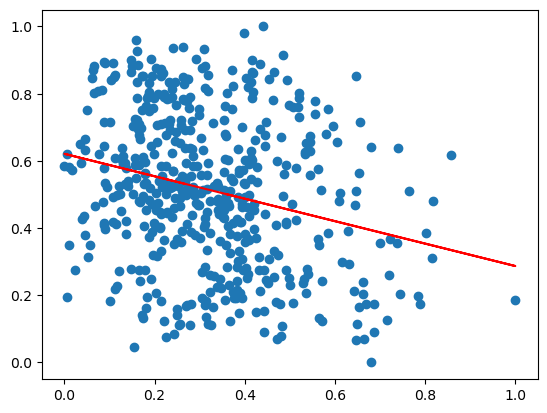

In [2783]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm_windspeed.iloc[:, 1], y_train)
plt.plot(X_train_lm_windspeed.iloc[:, 1], 0.621 + -0.334*X_train_lm_windspeed.iloc[:, 1], 'r')
plt.show()

In [2784]:
# Create a first fitted model for workingday
X_train_lm_temp = sm.add_constant(X_train[['temp']])
lr = sm.OLS(y_train, X_train_lm_temp).fit()
lr.params



const    0.169031
temp     0.640944
dtype: float64

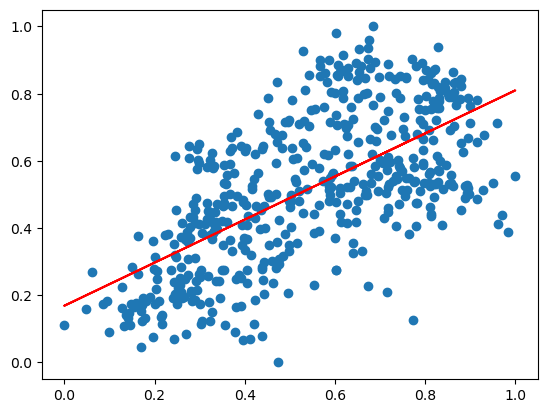

In [2785]:

# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm_temp.iloc[:, 1], y_train)
plt.plot(X_train_lm_temp.iloc[:, 1], 0.169 + 0.6409*X_train_lm_temp.iloc[:, 1], 'r')
plt.show()

In [2786]:
# -- windspeedwindspeed is insignificant as compare with temp variable hence can be dropped
X20 = X19.drop('windspeed', 1,)
# Build a third fitted model
X_train_lm20 = sm.add_constant(X20)

lr_20 = sm.OLS(y_train, X_train_lm20).fit()
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.10e-182
Time:                        12:03:04   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0902      0.030      2.964      0.0

In [2787]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X20.columns
vif['VIF'] = [variance_inflation_factor(X20.values, i) for i in range(X20.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
8,workingday,4.63
7,year,2.07
1,Sat,1.81
5,summer,1.75
4,spring,1.70
6,winter,1.59
3,MistBroken,1.57
0,Sep,1.23
2,LightSnow,1.07


## 6. Residual Analysis of the train data


In [2788]:
y_train_cnt = lr_20.predict(X_train_lm20)

Text(0.5, 0, 'Errors')

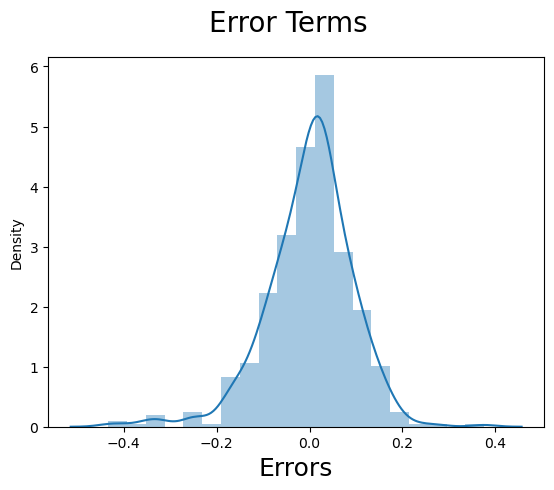

In [2789]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## 7. Making Predictions Using the Final Model


In [2790]:
dataset_test_ana.shape


(220, 30)

In [2791]:
dataset_test_ana.head()


,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,29.793347,33.27085,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,32.082500,36.04875,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,19.270000,22.85230,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,31.433347,34.24915,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,29.315000,32.19710,30.5000,19.583229,4968


In [2792]:
dataset_train.shape

(510, 29)

In [2793]:
dataset_test_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         220 non-null    uint8  
 1   Dec         220 non-null    uint8  
 2   Feb         220 non-null    uint8  
 3   Jan         220 non-null    uint8  
 4   July        220 non-null    uint8  
 5   June        220 non-null    uint8  
 6   Mar         220 non-null    uint8  
 7   May         220 non-null    uint8  
 8   Nov         220 non-null    uint8  
 9   Oct         220 non-null    uint8  
 10  Sep         220 non-null    uint8  
 11  Mon         220 non-null    uint8  
 12  Sat         220 non-null    uint8  
 13  Sun         220 non-null    uint8  
 14  Thu         220 non-null    uint8  
 15  Tue         220 non-null    uint8  
 16  Wed         220 non-null    uint8  
 17  LightSnow   220 non-null    uint8  
 18  MistBroken  220 non-null    uint8  
 19  spring      220 non-null   

In [2794]:
dataset_test_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         220 non-null    uint8  
 1   Dec         220 non-null    uint8  
 2   Feb         220 non-null    uint8  
 3   Jan         220 non-null    uint8  
 4   July        220 non-null    uint8  
 5   June        220 non-null    uint8  
 6   Mar         220 non-null    uint8  
 7   May         220 non-null    uint8  
 8   Nov         220 non-null    uint8  
 9   Oct         220 non-null    uint8  
 10  Sep         220 non-null    uint8  
 11  Mon         220 non-null    uint8  
 12  Sat         220 non-null    uint8  
 13  Sun         220 non-null    uint8  
 14  Thu         220 non-null    uint8  
 15  Tue         220 non-null    uint8  
 16  Wed         220 non-null    uint8  
 17  LightSnow   220 non-null    uint8  
 18  MistBroken  220 non-null    uint8  
 19  spring      220 non-null   

In [2795]:
#num_vars1 = ['temp',    'windspeed','cnt']
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars1 = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

#Fit on data
#scaler.fit(dataset_test[num_vars1])
dataset_test_ana[num_vars1] = scaler.transform(dataset_test_ana[num_vars1])
dataset_test_ana.head()

 

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [2796]:
dataset_test_ana.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [2797]:
dataset_test_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aug         220 non-null    uint8  
 1   Dec         220 non-null    uint8  
 2   Feb         220 non-null    uint8  
 3   Jan         220 non-null    uint8  
 4   July        220 non-null    uint8  
 5   June        220 non-null    uint8  
 6   Mar         220 non-null    uint8  
 7   May         220 non-null    uint8  
 8   Nov         220 non-null    uint8  
 9   Oct         220 non-null    uint8  
 10  Sep         220 non-null    uint8  
 11  Mon         220 non-null    uint8  
 12  Sat         220 non-null    uint8  
 13  Sun         220 non-null    uint8  
 14  Thu         220 non-null    uint8  
 15  Tue         220 non-null    uint8  
 16  Wed         220 non-null    uint8  
 17  LightSnow   220 non-null    uint8  
 18  MistBroken  220 non-null    uint8  
 19  spring      220 non-null   

In [2798]:
y_test = dataset_test_ana.pop('cnt')
X_test = dataset_test_ana

In [2799]:
X20.columns

Index(['Sep', 'Sat', 'LightSnow', 'MistBroken', 'spring', 'summer', 'winter',
       'year', 'workingday', 'temp'],
      dtype='object')

In [2800]:
X_test_new = X_test[X20.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Sat,LightSnow,MistBroken,spring,summer,winter,year,workingday,temp
184,1.0,0,0,0,1,0,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,1,0,1,1,0.901354
299,1.0,0,0,0,1,0,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,1,0,0,1,0.817246


In [2801]:
y_pred = lr_20.predict(X_test_new1)

In [2802]:
X_test_new1.head()

,const,Sep,Sat,LightSnow,MistBroken,spring,summer,winter,year,workingday,temp
184,1.0,0,0,0,1,0,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,1,0,1,1,0.901354
299,1.0,0,0,0,1,0,0,1,0,1,0.511964
221,1.0,0,0,0,0,0,0,0,0,1,0.881625
152,1.0,0,0,0,0,0,1,0,0,1,0.817246


In [2803]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8115083592040954

In [2804]:
Adj_r2=1-(1-0.81150)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905555555555556


Text(0, 0.5, 'y_pred')

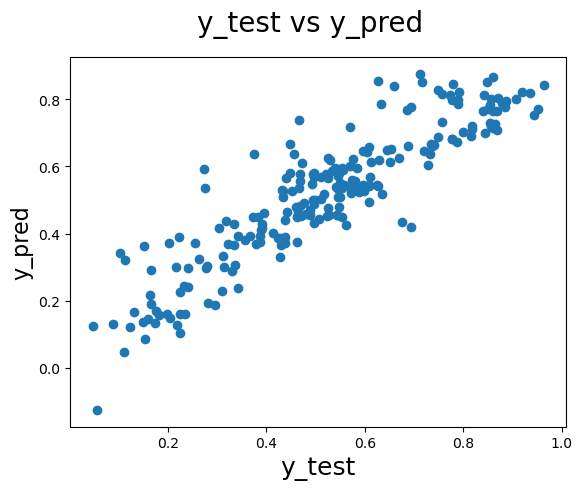

In [2805]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [2833]:
print("VIF of Train Dataset  \n",vif)

print("R^2 of Train Dataset 82.6% ")
print("Adjusted R^2 of Train Dataset 82.2% ")

print("R^2 of Test Dataset 81.15% ")
print("Adjusted R^2 of Test Dataset 79.05% ")

print("Difference between R^2 of Train and Test Dataset is less ")

print("\nObservations \n")
print("1. Temperature is correlated variable so company can consider this ")
print("2. Spring is negatively correlated variable ")
print("3. Workingday, Sat, Summer, winter, Sept, Weather with Mist Broken and Light Snow are also correlated variable ")
print("4. In 2019 has higher business / demand than 2018, so may be need to check the schemes launched in 2019 and may be company can relaunch it with some necessary modifications  ")


VIF of Train Dataset  
      Features   VIF
9        temp  4.72
8  workingday  4.63
7        year  2.07
1         Sat  1.81
5      summer  1.75
4      spring  1.70
6      winter  1.59
3  MistBroken  1.57
0         Sep  1.23
2   LightSnow  1.07
R^2 of Train Dataset 82.6% 
Adjusted R^2 of Train Dataset 82.2% 
R^2 of Test Dataset 81.15% 
Adjusted R^2 of Test Dataset 79.05% 
Difference between R^2 of Train and Test Dataset is less 

Observations 

1. Temperature is correlated variable so company can consider this 
2. Spring is negatively correlated variable 
3. Workingday, Sat, Summer, winter, Sept, Weather with Mist Broken and Light Snow are also correlated variable 
4. In 2019 has higher business / demand than 2018, so may be need to check the schemes launched in 2019 and may be company can relaunch it with some necessary modifications  
